In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('plot_style_mk.mplstyle')
%matplotlib inline
plt.rcParams['axes.prop_cycle'] = plt.cycler(color = ['navy','brown','royalblue'])

In [2]:
file = './Data/Clean rent data_Hamburg.csv'
df = pd.read_csv(file)
df.head()

,Area ($m^2$),Number of rooms,Latitude,Longitude,Rent (in eur)
0,45.43,1.0,53.571509,10.012736,995.0
1,51.86,2.0,53.483600,10.125000,1135.0
2,45.64,2.0,53.492292,9.996217,1118.0
3,52.07,2.0,53.542913,9.995835,1275.0
4,57.25,2.0,53.596390,10.003832,1374.0


In [3]:
print(f'With duplicates = {df.shape}')
print(df.duplicated().any())
df = df.drop_duplicates()
print(f'With out duplicates = {df.shape}')

With duplicates = (858, 5)
False
With out duplicates = (858, 5)


In [4]:
df.describe()

,Area ($m^2$),Number of rooms,Latitude,Longitude,Rent (in eur)
count,858.000000,858.000000,858.000000,858.000000,858.000000
mean,69.204569,2.339161,53.567036,10.013878,1122.517424
std,29.653938,0.934746,0.052521,0.096370,607.992761
min,11.000000,1.000000,53.420677,9.756390,248.390000
25%,50.007500,2.000000,53.553443,9.958261,700.250000
50%,65.540000,2.000000,53.572937,10.007348,973.685000
75%,82.000000,3.000000,53.598894,10.075535,1372.502500
max,223.040000,6.000000,53.705521,10.272787,4275.000000


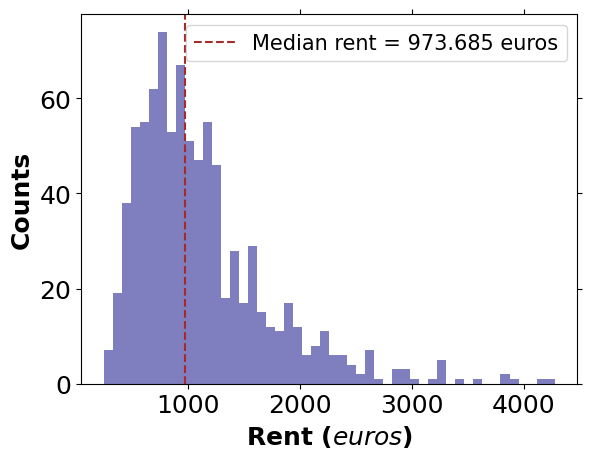

In [5]:
median = df['Rent (in eur)'].median()
fig1, ax1 = plt.subplots()
ax1.hist(df['Rent (in eur)'], bins = 50, alpha = 0.5)
ax1.axvline(df['Rent (in eur)'].median(), color = 'brown', ls ='--', label = f'Median rent = {median} euros' )
ax1.legend(fontsize='small')
ax1.set_xlabel('Rent ($euros$)')
ax1.set_ylabel('Counts')
# plt.savefig('Rent_distribution.png', bbox_inches = 'tight')

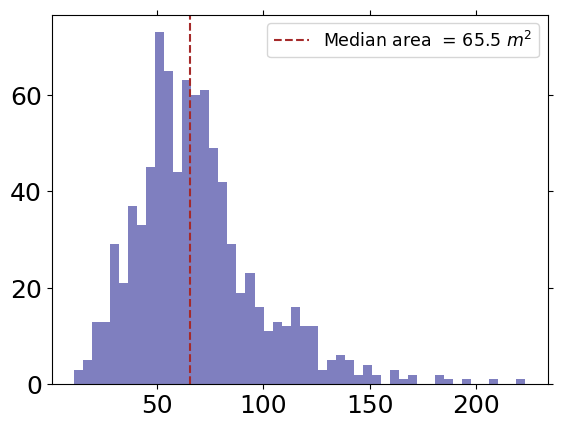

In [6]:
median_area = df['Area ($m^2$)'].median()
fig2, ax2 = plt.subplots()
ax2.hist(df['Area ($m^2$)'], bins = 50, alpha = 0.5)
ax2.axvline(df['Area ($m^2$)'].median(), color = 'brown', ls ='--', label = f'Median area  = {np.round(median_area,1)} $m^2$' )
ax2.legend(fontsize='x-small')

In [7]:
BBox = ((df.Longitude.min(),   df.Longitude.max(), df.Latitude.min(), df.Latitude.max()))
print(BBox)

(9.75639, 10.272787, 53.4206766, 53.7055213)


In [8]:
df_lat_uni = df['Latitude'].value_counts().rename_axis('Lat').reset_index(name='counts')
df_lat_uni.head()

,Lat,counts
0,53.596390,40
1,53.603883,39
2,53.572937,28
3,53.598894,27
4,53.596777,27


In [9]:
df_lon_uni = df['Longitude'].value_counts().rename_axis('Lon').reset_index(name='counts')
df_lon_uni.head()

,Lon,counts
0,10.003832,40
1,10.158155,39
2,9.958261,28
3,10.048100,27
4,9.928410,27


In [10]:
x = df_lat_uni.Lat.to_numpy()
y = df_lon_uni.Lon.to_numpy()
z = df_lat_uni.counts.to_numpy()

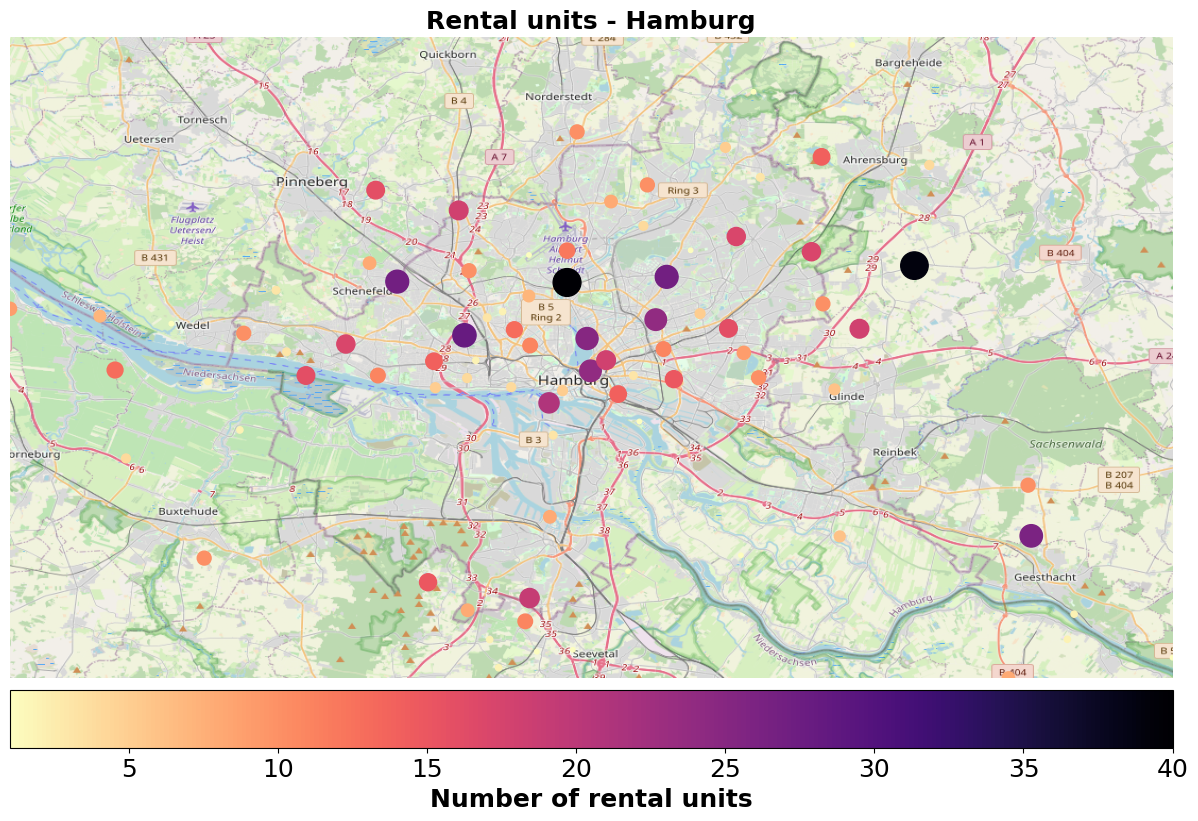

In [11]:
img = plt.imread('./Figures/Hamburg_map.png')

fig3, ax3 = plt.subplots(figsize=(15,15))
cm = plt.cm.get_cmap('magma_r')

cbar = ax3.scatter(y, x, c=z, vmin=min(z), vmax=max(z), s = z*10, cmap=cm)
ax3.set_title('Rental units - Hamburg', weight = 'bold', fontsize = 18)
ax3.set_xlim(BBox[0],BBox[1])
ax3.set_ylim(BBox[2],BBox[3])
ax3.imshow(img, extent = BBox, aspect = 'equal')
ax3.axis('off')
plt.colorbar(cbar, location = 'bottom', label = 'Number of rental units', pad = 0.01)
# plt.savefig('Property_locations.png', bbox_inches = 'tight')